<a href="https://colab.research.google.com/github/Archi1809/Machine_learning/blob/main/ArchiGupta_102016074.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Importing dataset

In [77]:
import pandas as pd
dt = pd.read_csv('breast-cancer.csv')
dt

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [78]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##2. Pre -processing of data

Checking for missing values

<Axes: >

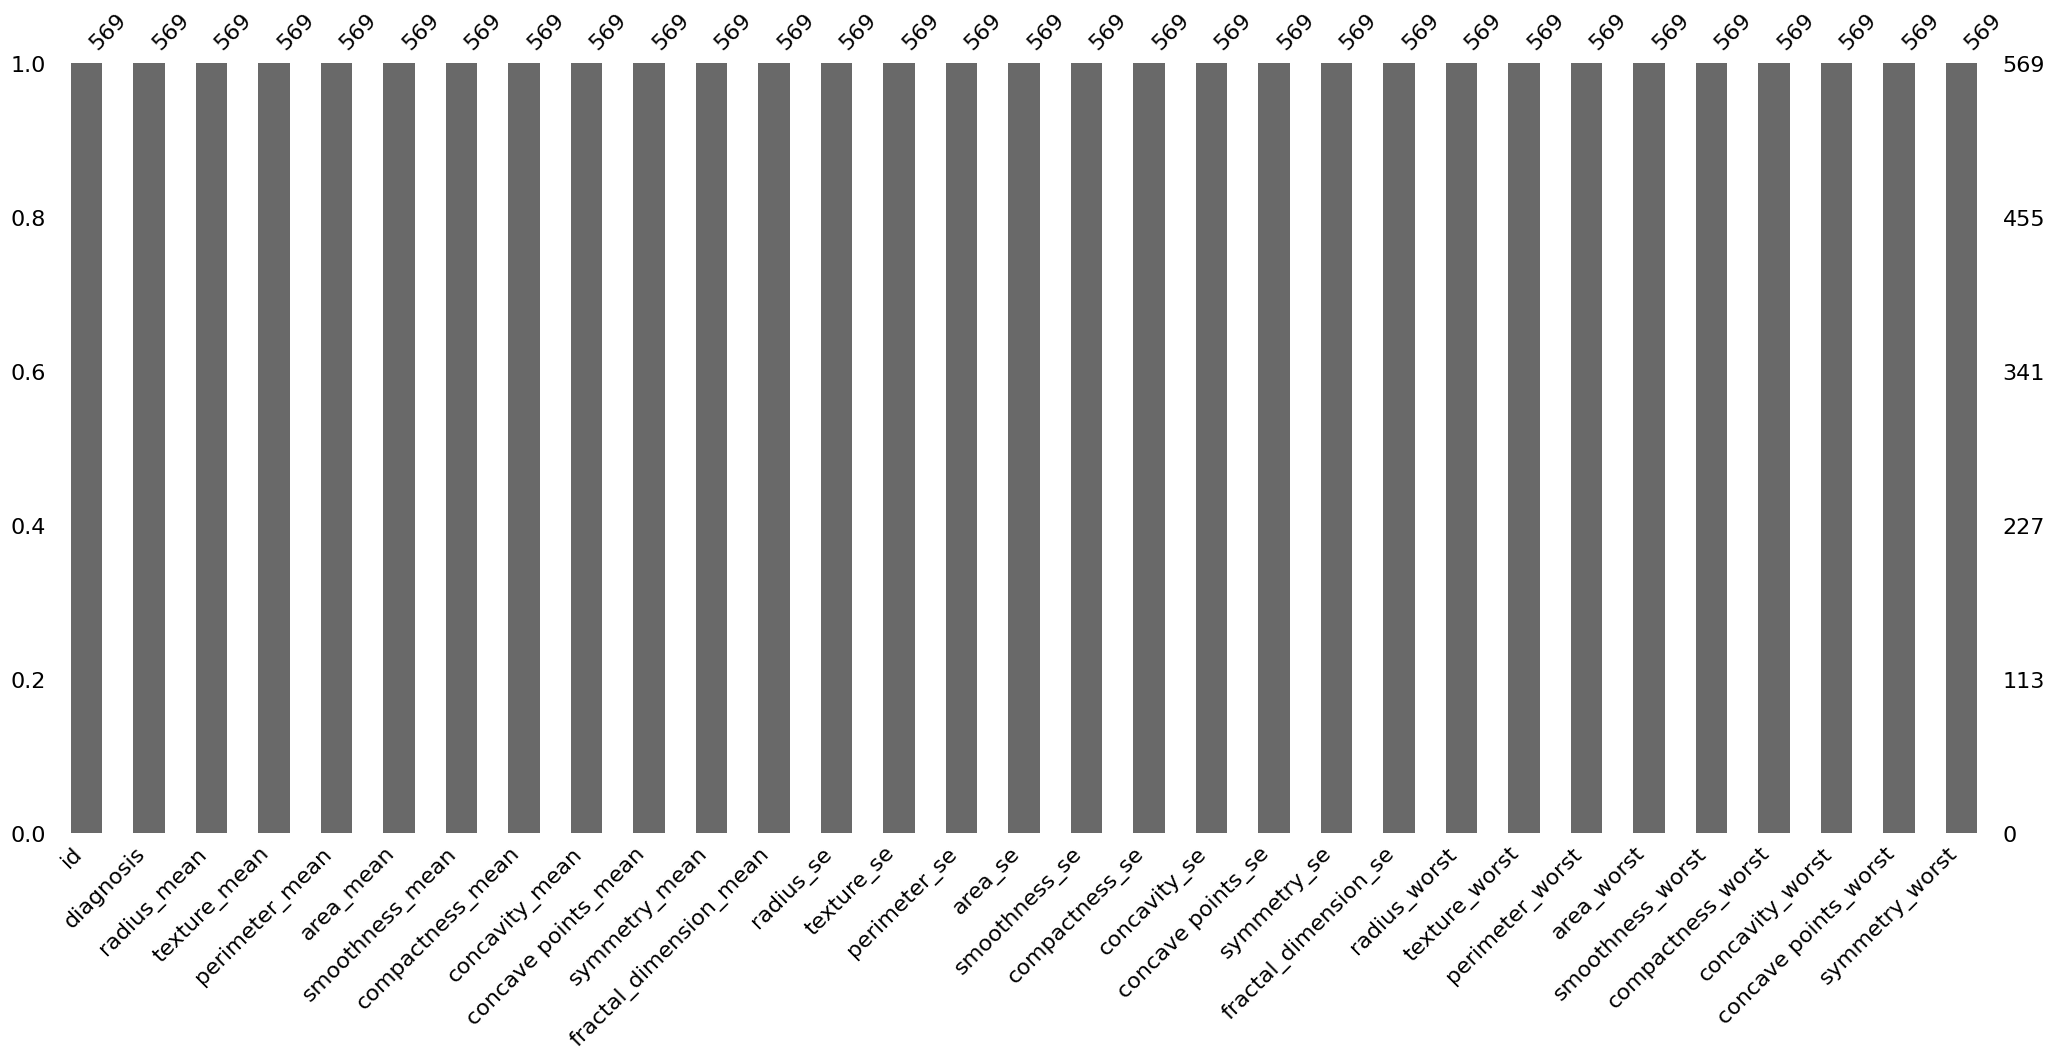

In [80]:
import missingno as msn
msn.bar(dt.iloc[:,0:31])

Initial Data Cleaning

In [81]:
data = dt.copy()

Label encoding or lambda ; use either

In [82]:
# data['diagnosis'] = data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['diagnosis']= label_encoder.fit_transform(data['diagnosis'])
data['diagnosis'].unique()

array([1, 0])

In [83]:
data = data.drop('id', axis=1)

<Axes: >

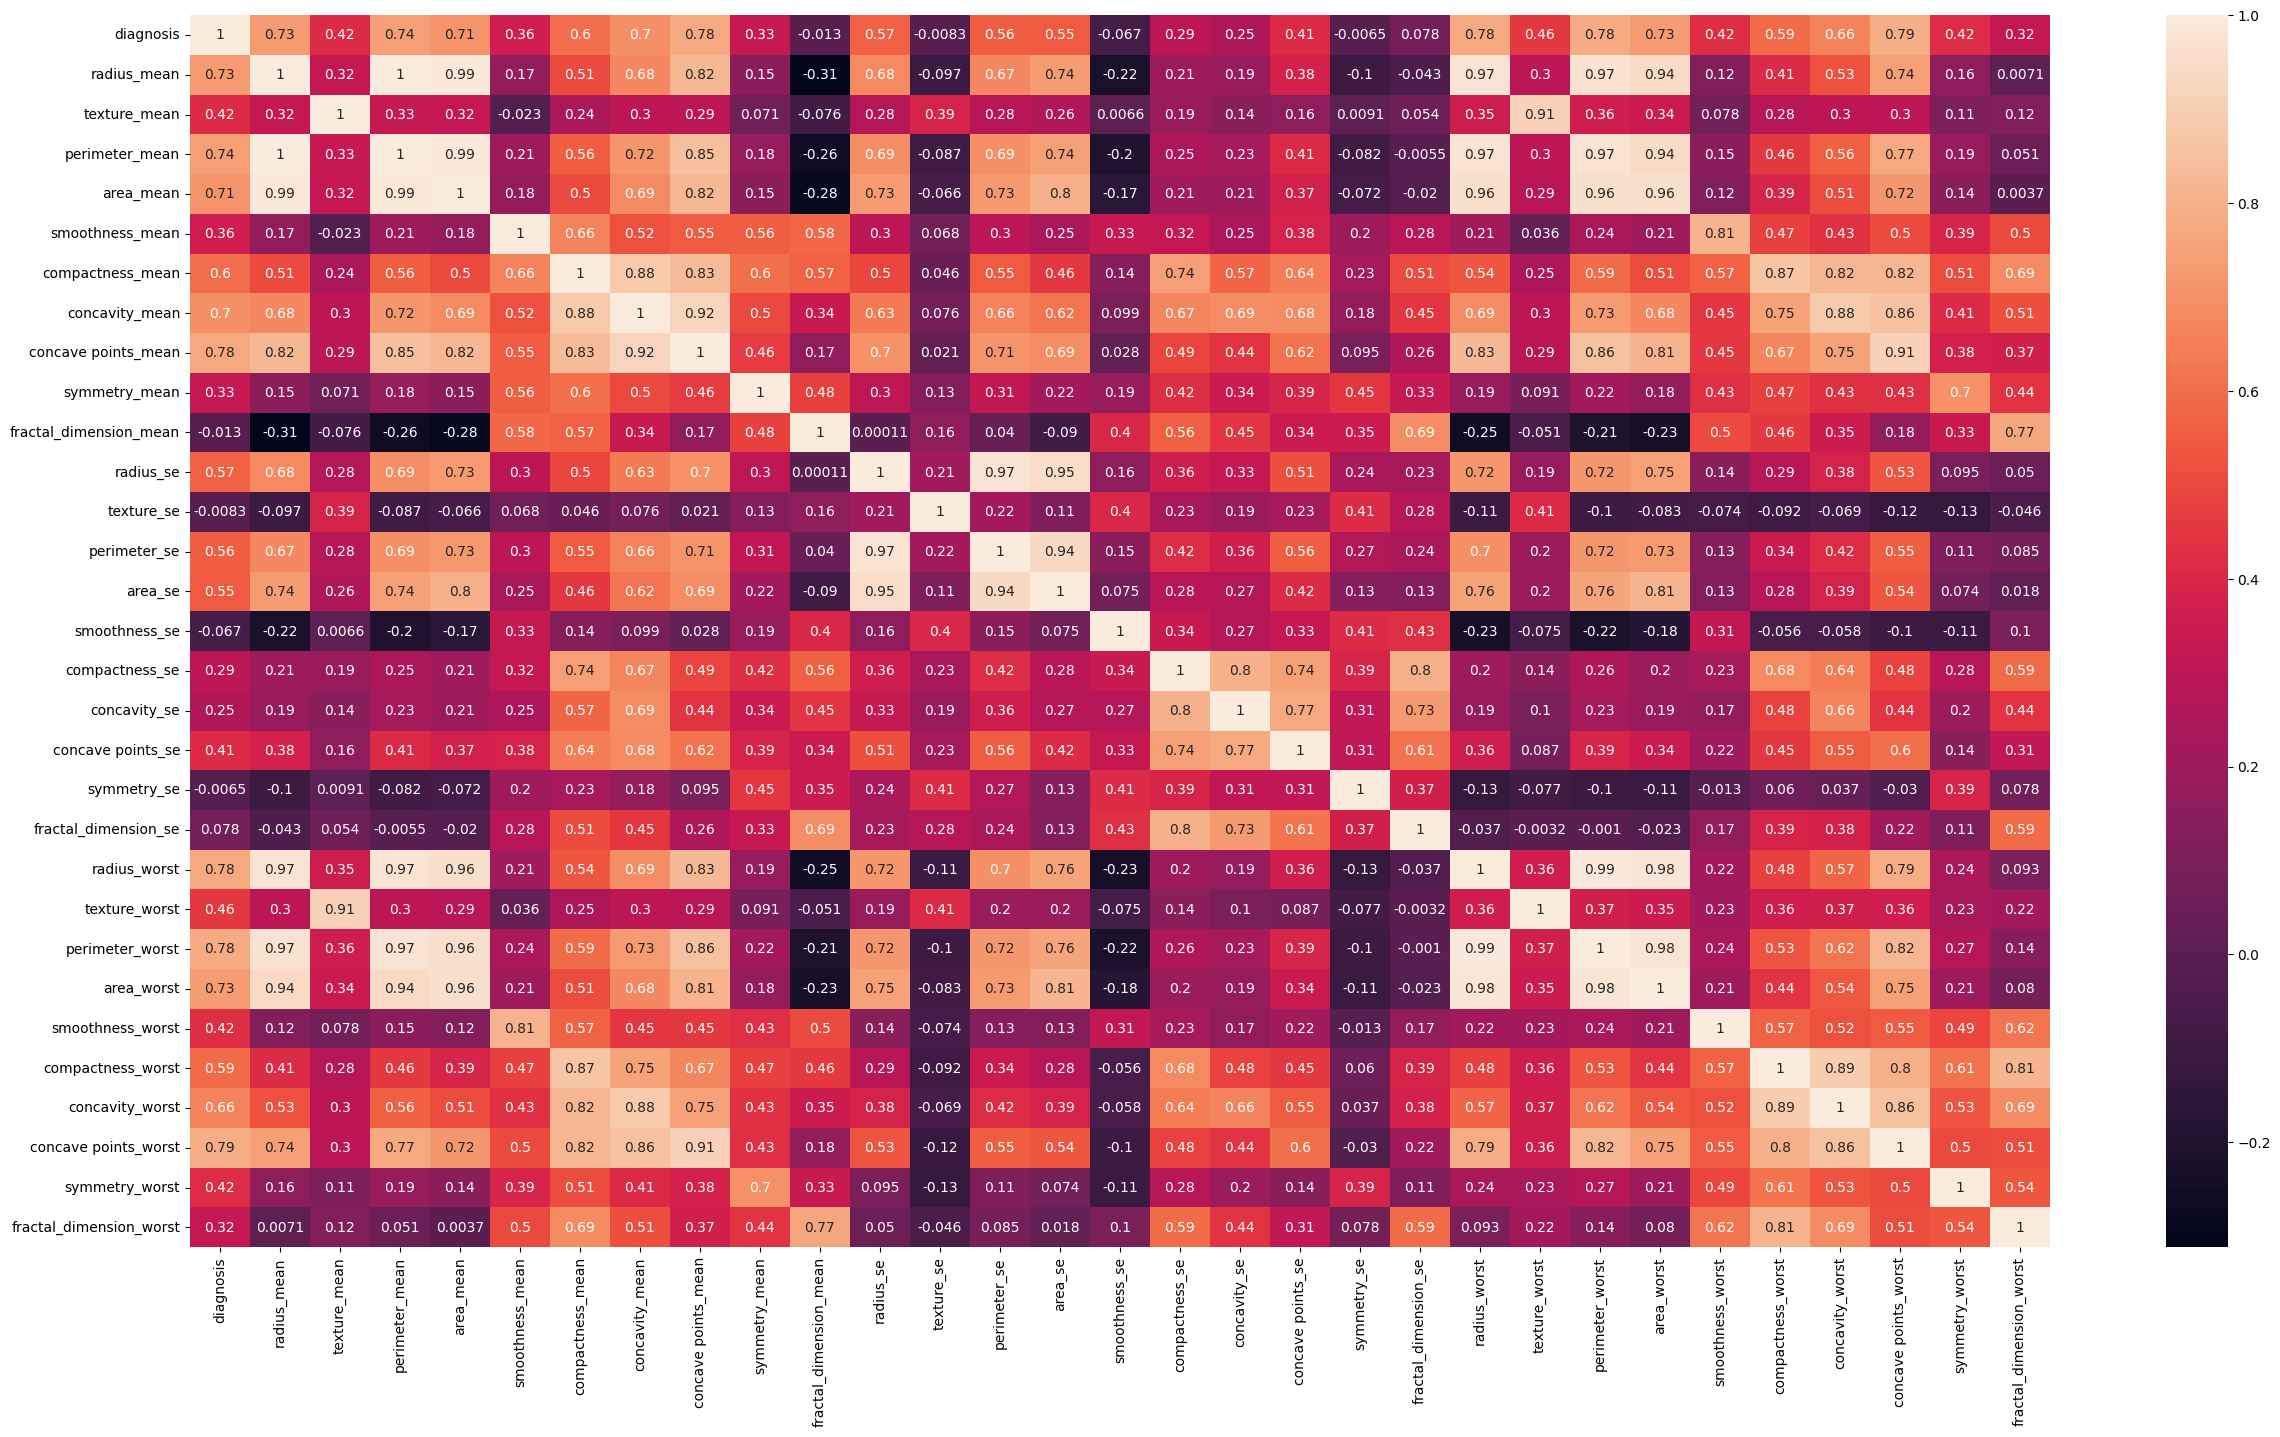

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,16))
sns.heatmap(data.corr(),annot=True)

<Axes: ylabel='diagnosis'>

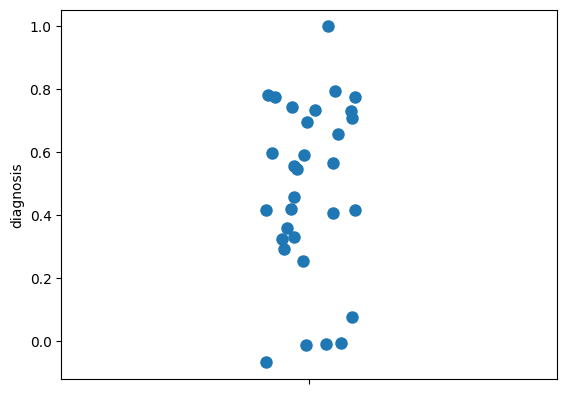

In [85]:
# scatterplot
sns.stripplot(data.corr()['diagnosis'], size=9)

In [86]:
# Print the
data.corr()['diagnosis'].sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

##3. Feature selection

In [87]:
# dt.drop(['perimeter_mean','perimeter_worst'],axis =1).values

##4. Splitting I/P and O/P

In [88]:
# X=dt.iloc[:,0:31]
# Y=dt.iloc[:,-1]
y = data['diagnosis']
X = data.loc[:, data.columns != 'diagnosis']

##5. Splitting into train and test

In [89]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled=np.insert(X_scaled,0,values=1,axis=1)

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,y,test_size=0.3,random_state = 42)

##6. Model selection

In [91]:
 #Lets split our data and apply a LogisticRegression model to start

from sklearn.linear_model import LogisticRegression

#model_norm = LogisticRegression()
model_scaled = LogisticRegression()
#model_norm.fit(X_train,y_train)
model_scaled.fit(X_train, Y_train)

LogisticRegression()

In [92]:
# lets see what our models performance is
Y_pred = model_scaled.predict(X_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_pred))

# accuracy: Accuracy = (TP + TN)/(TP + FP + TN + FN)
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Y_pred))

# precision: Precision = TP/(TP + FP)
from sklearn.metrics import precision_score
print(precision_score(Y_test, Y_pred))

# recall: Recall = TP/(TP + FN)
from sklearn.metrics import recall_score
print(recall_score(Y_test, Y_pred))

# F1 score weighted average of precision and recall
from sklearn.metrics import f1_score
print(f1_score(Y_test, Y_pred))

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

[[106   2]
 [  1  62]]
0.9824561403508771
0.96875
0.9841269841269841
0.9763779527559054
Mean Squared Error: 0.017543859649122806


##8. USING KNN ALGO

In [93]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, Y_train)
y_label2=knn_model.predict(X_test)

EVALUATION PARAMETER

In [94]:
# from sklearn.metrics import accuracy_score
print (accuracy_score(Y_test, y_label2))
print(mean_squared_error(Y_test, y_label2))

ValueError: ignored